In [225]:
# Sales of video games
#Import needed libraries 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)




# Read in the data
pd.options.mode.chained_assignment = None

df = pd.read_csv(r'vgsales.csv')

In [227]:
#View the data
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [229]:
# Detect missing data using a for loop

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Rank - 0%
Name - 0%
Platform - 0%
Year - 2%
Genre - 0%
Publisher - 0%
NA_Sales - 0%
EU_Sales - 0%
JP_Sales - 0%
Other_Sales - 0%
Global_Sales - 0%


In [233]:
#Drop rows with missing values in Year
df_cleaned = df.dropna(subset=['Year'])

In [237]:
#Convert Year to integer
df_cleaned['Year'] = df_cleaned['Year'].astype(int)

In [243]:
#Explore variable data types
print(df_cleaned.dtypes)

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [245]:
#Print data types
print(df_cleaned.dtypes)

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [247]:
df_cleaned.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<Axes: >

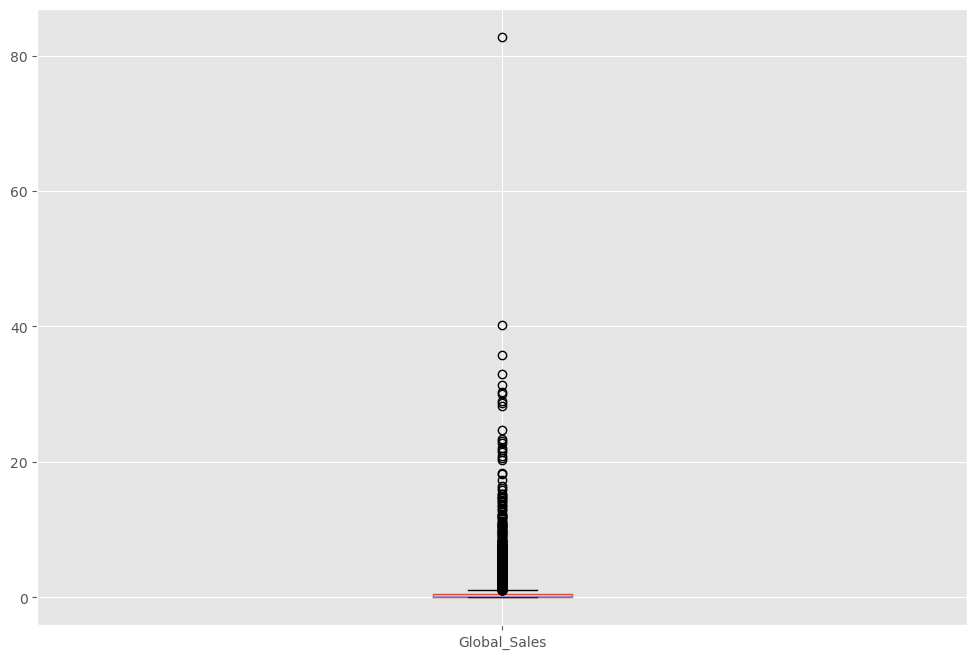

In [173]:
# Detect outliers

df_cleaned.boxplot(column=['Global_Sales'])

In [249]:
#Drop duplicates 
df_cleaned.drop_duplicates()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [253]:
# Order our data by Global Sales 

df_cleaned.sort_values(by=['Global_Sales'], inplace=False, ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16184,16187,Fatal Fury: Battle Archives Volume 2 (JP sales),PS2,2007,Fighting,SNK Playmore,0.00,0.00,0.01,0.00,0.01
16185,16188,Tantei Jinguuji Saburo: Hai to Diamond,PSP,2009,Adventure,Arc System Works,0.00,0.00,0.01,0.00,0.01
16186,16189,BattleForge,PC,2009,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16187,16190,Jewel Quest II,PC,2007,Puzzle,Avanquest,0.00,0.01,0.00,0.00,0.01


In [255]:
# Correlation Matrix between all numeric columns

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='pearson')
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                   Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178814 -0.401362 -0.379123 -0.267785    -0.332986   
Year          0.178814  1.000000 -0.091402  0.006014 -0.169316     0.041058   
NA_Sales     -0.401362 -0.091402  1.000000  0.767727  0.449787     0.634737   
EU_Sales     -0.379123  0.006014  0.767727  1.000000  0.435584     0.726385   
JP_Sales     -0.267785 -0.169316  0.449787  0.435584  1.000000     0.290186   
Other_Sales  -0.332986  0.041058  0.634737  0.726385  0.290186     1.000000   
Global_Sales -0.427407 -0.074735  0.941047  0.902836  0.611816     0.748331   

              Global_Sales  
Rank             -0.427407  
Year             -0.074735  
NA_Sales          0.941047  
EU_Sales          0.902836  
JP_Sales          0.611816  
Other_Sales       0.748331  
Global_Sales      1.000000  


In [257]:
# Look at the top 15 video game names by global sales

NameSalesSum = df_cleaned.groupby('Name')[["Global_Sales"]].sum()

NameSalesSumSorted = NameSalesSum.sort_values('Global_Sales', ascending = False)[:15]

NameSalesSumSorted = NameSalesSumSorted['Global_Sales'].astype('float64') 

NameSalesSumSorted

Name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.82
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Modern Warfare 3    30.83
New Super Mario Bros.             30.01
Call of Duty: Black Ops II        29.72
Call of Duty: Black Ops           29.40
Wii Play                          29.02
New Super Mario Bros. Wii         28.62
Duck Hunt                         28.31
Call of Duty: Ghosts              27.38
Name: Global_Sales, dtype: float64

In [259]:
#Encode object columns
for col_name in df_cleaned.columns:
    if(df_cleaned[col_name].dtype == 'object'):
        df_cleaned[col_name]= df_cleaned[col_name].astype('category')
        df_cleaned[col_name] = df_cleaned[col_name].cat.codes

In [261]:
#View encoded data
df_cleaned

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,10883,26,2006,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9229,11,1985,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5508,26,2008,6,359,15.85,12.88,3.79,3.31,35.82
3,4,10885,26,2009,10,359,15.75,11.01,3.28,2.96,33.00
4,5,7266,5,1996,7,359,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,10976,6,2002,4,269,0.01,0.00,0.00,0.00,0.01
16594,16597,5728,7,2003,8,241,0.01,0.00,0.00,0.00,0.01
16595,16598,8059,16,2008,6,21,0.00,0.00,0.00,0.00,0.01
16596,16599,4952,4,2010,5,8,0.00,0.01,0.00,0.00,0.01


In [265]:
#Correlation between all columns
df_cleaned.corr(method='pearson')


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.014078,-0.084946,0.178814,-0.055323,-0.023943,-0.400328,-0.379024,-0.269138,-0.332521,-0.426880
Name,-0.014078,1.000000,0.011500,-0.001392,-0.004311,0.026587,0.012616,0.006564,0.015876,-0.007052,0.011021
Platform,-0.084946,0.011500,1.000000,0.167823,0.027574,-0.014521,0.042067,0.046957,-0.078994,0.054892,0.028216
Year,0.178814,-0.001392,0.167823,1.000000,-0.124994,0.029447,-0.091402,0.006014,-0.169316,0.041058,-0.074735
Genre,-0.055323,-0.004311,0.027574,-0.124994,1.000000,-0.049825,0.018055,0.017110,0.030456,0.009959,0.022297
Publisher,-0.023943,0.026587,-0.014521,0.029447,-0.049825,1.000000,0.005819,0.013771,0.053768,0.015399,0.020024
NA_Sales,-0.400328,0.012616,0.042067,-0.091402,0.018055,0.005819,1.000000,0.768936,0.451285,0.634508,0.941268
EU_Sales,-0.379024,0.006564,0.046957,0.006014,0.017110,0.013771,0.768936,1.000000,0.436414,0.726266,0.903271
JP_Sales,-0.269138,0.015876,-0.078994,-0.169316,0.030456,0.053768,0.451285,0.436414,1.000000,0.290653,0.612794
Other_Sales,-0.332521,-0.007052,0.054892,0.041058,0.009959,0.015399,0.634508,0.726266,0.290653,1.000000,0.747974


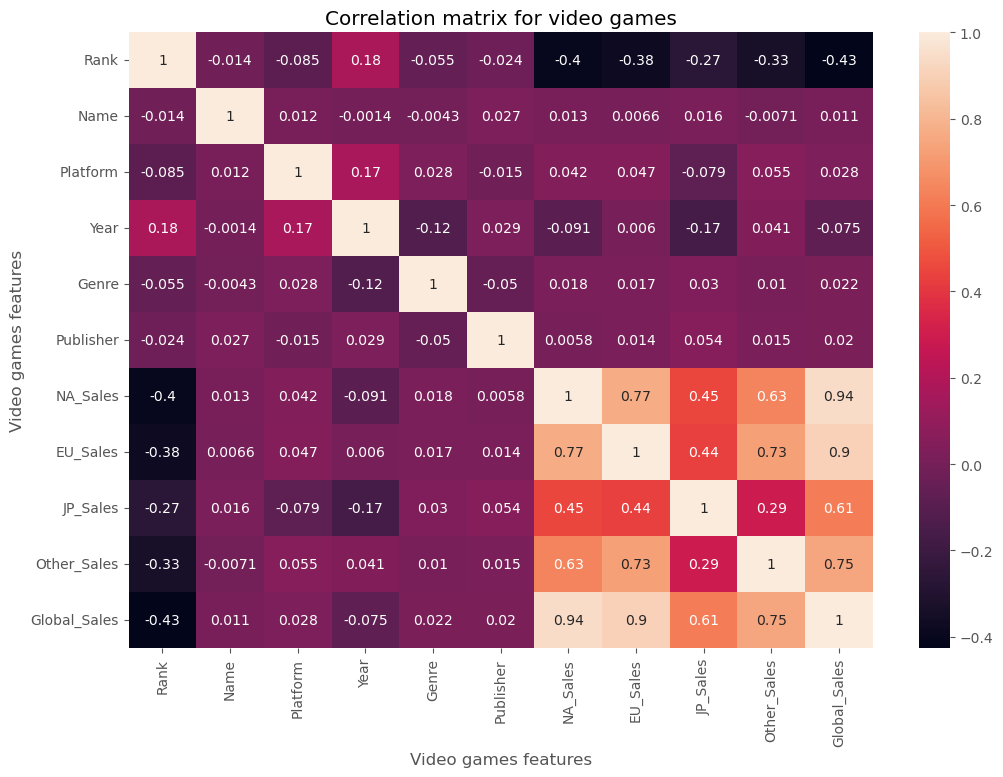

In [267]:
#Correlation matrix 
correlation_matrix = df_cleaned.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for video games")

plt.xlabel("Video games features")

plt.ylabel("Video games features")

plt.show()

<Axes: xlabel='Global_Sales', ylabel='NA_Sales'>

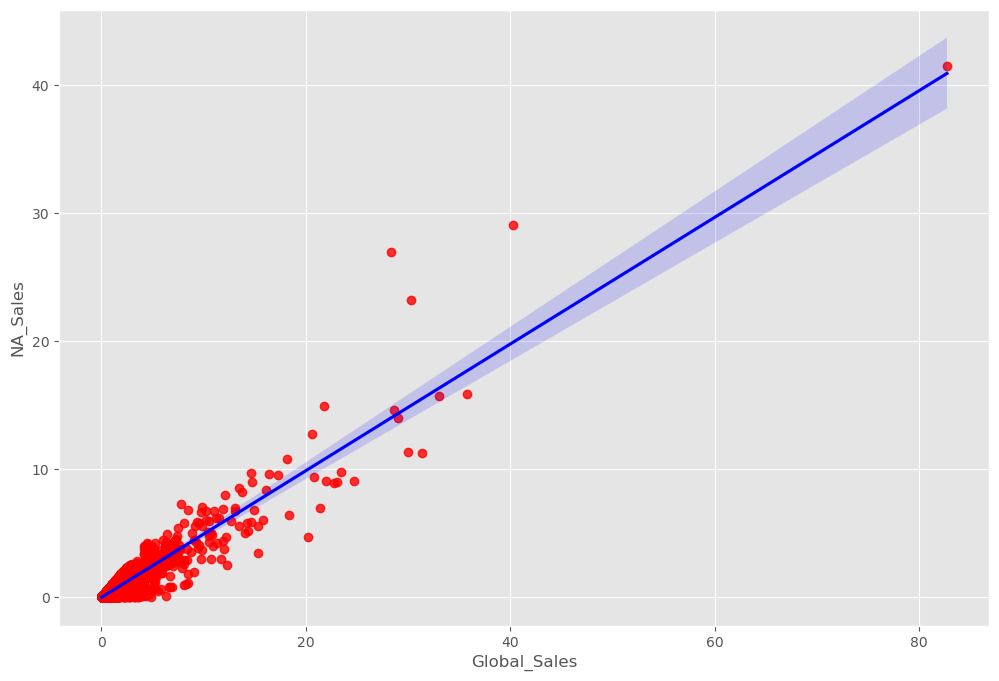

In [269]:
#Scatter Plot for Global Sales and NA_Sales
import seaborn as sns
sns.regplot(x="Global_Sales", y="NA_Sales", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})


<Axes: xlabel='Global_Sales', ylabel='JP_Sales'>

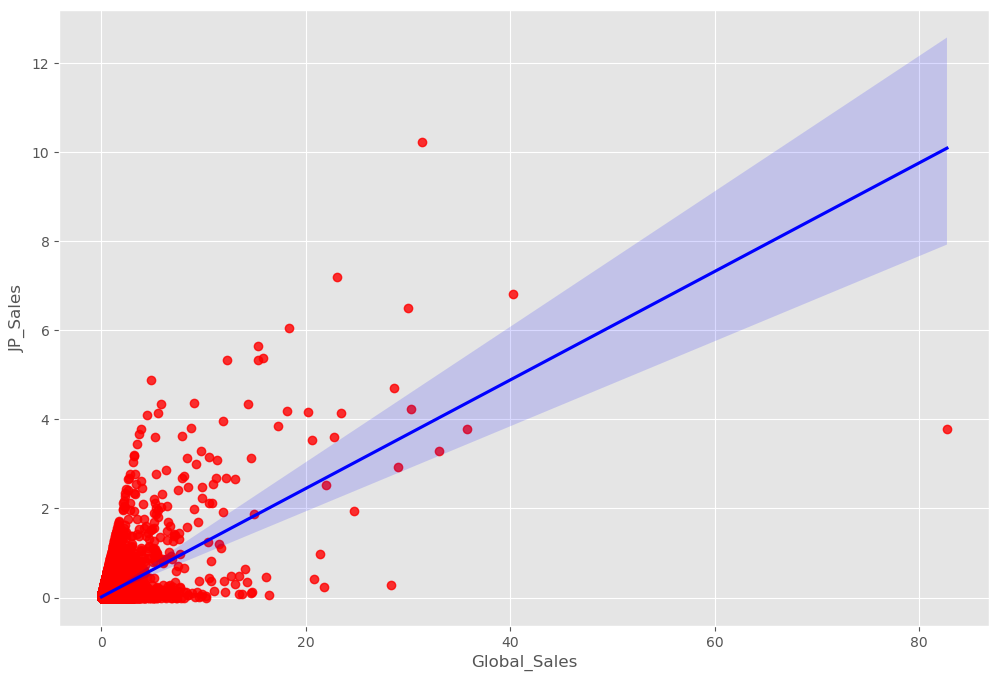

In [271]:
#Scatter Plot for Global Sales and JP_Sales
import seaborn as sns
sns.regplot(x="Global_Sales", y="JP_Sales", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})


In [273]:
#Transform the DataFrame into series format
corr_pairs = df_cleaned.unstack()

print(corr_pairs)

Rank          0        1.00
              1        2.00
              2        3.00
              3        4.00
              4        5.00
                       ... 
Global_Sales  16593    0.01
              16594    0.01
              16595    0.01
              16596    0.01
              16597    0.01
Length: 179597, dtype: float64


In [185]:
correlation_mat = df_cleaned.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

Rank          Rank            1.000000
              Name            0.878635
              Platform        0.146724
              Year           -0.043807
              Genre           0.142316
                                ...   
Global_Sales  NA_Sales        0.122301
              EU_Sales       -0.018831
              JP_Sales       -0.135262
              Other_Sales     0.338871
              Global_Sales    1.000000
Length: 121, dtype: float64


In [186]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

EU_Sales      Name           -0.350658
Name          EU_Sales       -0.350658
EU_Sales      Rank           -0.348254
Rank          EU_Sales       -0.348254
NA_Sales      Name           -0.227197
                                ...   
Year          Year            1.000000
Platform      Platform        1.000000
Name          Name            1.000000
Other_Sales   Other_Sales     1.000000
Global_Sales  Global_Sales    1.000000
Length: 121, dtype: float64


In [187]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

Name          Global_Sales    0.572653
Global_Sales  Name            0.572653
              Rank            0.663033
Rank          Global_Sales    0.663033
              Name            0.878635
Name          Rank            0.878635
Rank          Rank            1.000000
Publisher     Publisher       1.000000
JP_Sales      JP_Sales        1.000000
EU_Sales      EU_Sales        1.000000
NA_Sales      NA_Sales        1.000000
Genre         Genre           1.000000
Year          Year            1.000000
Platform      Platform        1.000000
Name          Name            1.000000
Other_Sales   Other_Sales     1.000000
Global_Sales  Global_Sales    1.000000
dtype: float64


<Axes: xlabel='Genre', ylabel='Global_Sales'>

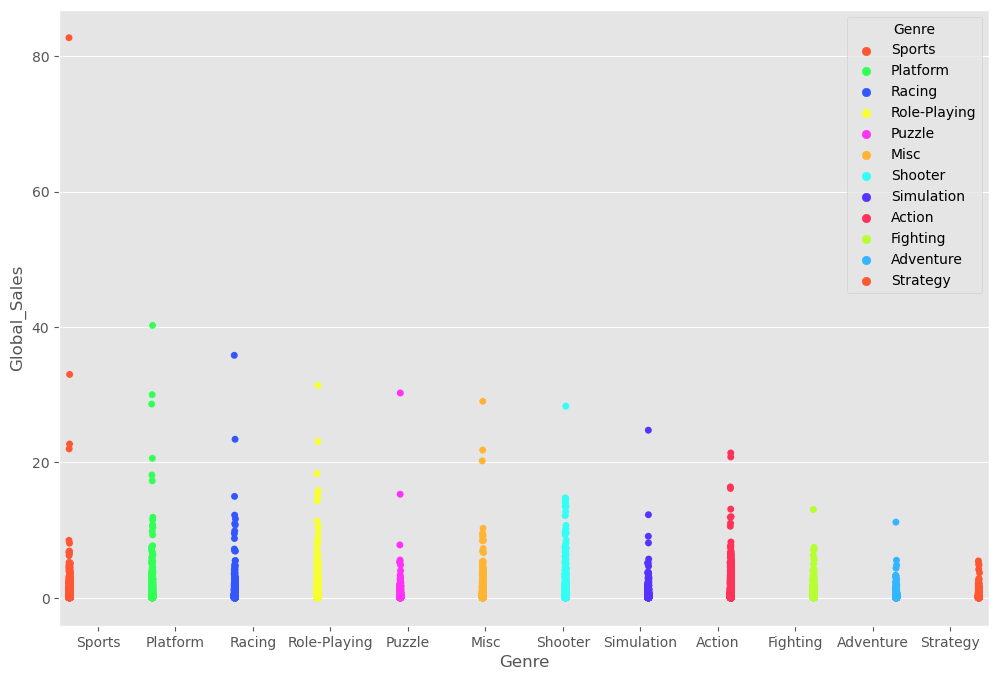

In [221]:
# Define a custom color palette
custom_palette = sns.color_palette(["#FF5733", "#33FF57", "#3357FF", "#F7FF33", "#FF33F7",
    "#FFB533", "#33FFF7", "#5733FF", "#FF3357", "#B5FF33",
    "#33B5FF", "#FF5733"])

# Create the strip plot with custom colors for each genre
sns.stripplot(x="Genre", y="Global_Sales", data=df, hue="Genre", palette=custom_palette, dodge=True)
